<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Local Search Practical Assignment (30 + 10 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this assignment you will solve the traveling salesman problem using hill climbing, simulated annealing and genetic algorithms.

In [3]:
# do not import other packages for this assignment
'''
'''
import matplotlib.pyplot as plt
import numpy as np

The traveling salesperson problem (TSP) is a touring problem in which each city must be visited exactly once. The aim is to find the shortest tour. The problem is known to be NP-hard, but an enormous amount of effort has been expended to improve the capabilities of TSP algorithms. In addition to planning trips for traveling salespersons, these algorithms have been used for tasks such as planning movements of automatic circuit-board drills and of stocking machines on shop floors.

In this notebook we will use matplotlib library to visualize the problem. we represent each city as a point in a 800*800 rectnagle. the positions of the cities are randomly chosen. run the next codeblock to randomly choose the cities.

In [4]:
WIDTH = 800
HEIGHT = 800
CITY_NUM = 30


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y


cities = [City(np.random.randint(10,WIDTH-10),np.random.randint(10,HEIGHT-10)) for i in range(CITY_NUM)] 

The next function helps you visualize the problem.

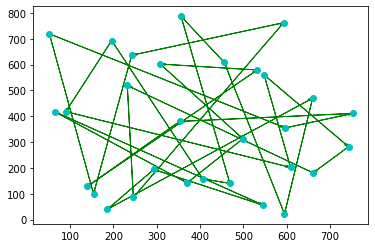

In [5]:
def plotTSP(cities):
    '''
    Inputs:
    - cities : list of cities. ordered by path
    '''
    x = []
    y = []
    for city in cities:
        x.append(city.x)
        y.append(city.y)
    plt.plot(x,y,'co')
    
    a_scale = float(max(x))/float(100)
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

plotTSP(cities)

complete the following helper functions. a test cases has been given to you to make sure your implement these functions correctly.

In [6]:
# 5 points
import math
def get_distance_between_two_city(c1 : City, c2 : City):
    '''
    Inputs:
    - c1,c2 : the two cities of type City
    Output: Euclidean distance between them.
    '''
    x_c1 = c1.x
    y_c1 = c1.y
    x_c2 = c2.x
    y_c2 = c2.y
    distance = math.sqrt((x_c1 - x_c2) ** 2 + (y_c1 - y_c2) ** 2)
    return distance

def get_distance_tsp(cities):
    '''
    Inputs:
    - cities : list of cities of form [c1, c2, ..., cn]. ordered by path
    Output: tsp distance.
    '''
    answer = 0
    for i in range(len(cities) - 1):
        answer += get_distance_between_two_city(cities[i], cities[i + 1])


    return answer + get_distance_between_two_city(cities[len(cities) - 1], cities[0])

# testcase
c1 = City(10, 10)
c2 = City(10, 20)
c3 = City(20, 10)
c4 = City(40, 40)
get_distance_tsp([c1,c2,c3,c4])  # should be around 102.62

102.6240552495637

# Algorithm 1 : Hill Climbing (12 points)

implement a hill climbing algorithm for the problem. you dont have to add sideways move to the hill climbing algorithm. meaning that if a neighbor with a smaller path length does not exist you can terminate and return the existing path as the solution. we define a neighbouring solution as changing the place of two cities. for example if our solution is [c1, c2, c3, c4, c5] then one of the possible next solution would be [c4, c2, c3, c1, c5].   
at each timestep generate all the possible next solution and pick the best one. if one does not exist return the current solution.  

* make sure to use the .copy function when you want to have another copy of a list.
* print the the distance at each iteration of hill climbing

iteration0,distance=11900.773213312603
iteration0,distance=11851.122458575674
iteration0,distance=11839.637342042372
iteration0,distance=11775.94217057096
iteration0,distance=11703.227449757249
iteration0,distance=11634.873685000886
iteration0,distance=11409.223417009744
iteration0,distance=10731.45164703437
iteration0,distance=10536.033335322092
iteration0,distance=10481.101662995943
iteration0,distance=10389.338484115477
iteration0,distance=10263.002759794072
iteration0,distance=10245.947872665964
iteration0,distance=9616.776648394505
iteration0,distance=9452.576013949321
iteration0,distance=9434.300252870731
iteration0,distance=8759.847547318512
iteration0,distance=8724.972485955863
iteration0,distance=8681.06400229637
iteration0,distance=8676.694713919467
iteration0,distance=8674.281333616447
iteration0,distance=8543.353455907225
iteration0,distance=8161.0955137827295
iteration0,distance=8151.805799161175
iteration0,distance=8133.716732035653
iteration0,distance=7945.397948564276
i

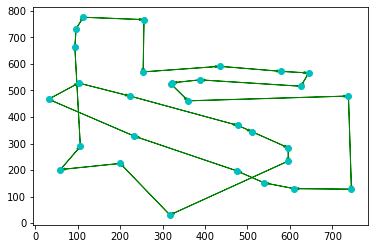

In [5]:

def tsp_hill_climbing(cities):
    
    current_cities = list(cities)
    current_dist = get_distance_tsp(cities)
    while True:
        start_dist = current_dist
        for i in range(len(cities)):
            for j in range(len(cities)):
                new_list = list(current_cities)
                new_list[i], new_list[j] = new_list[j], new_list[i]
                new_dist = get_distance_tsp(new_list)
                if new_dist < current_dist:
                    print(f"iteration0,distance={new_dist}")
                    current_cities = list(new_list)
                    current_dist = new_dist
                    
        if current_dist == start_dist:
            return current_cities



    '''
    Inputs:
    - cities   : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - solution : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    

solution = tsp_hill_climbing(cities)

print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)


# Algorithm 2: Simulated Annealing (13 points)

In this part we will use simulated annealing to solve the tsp problem. In order to generate a random neighbor of a state. choose two cities at random. then flip a fair coin and do one of the following based on the outcome.  
1 - change the position of the two cities (like algorithm 1)  
2 - reverse the cities between these two cities. example : our initial state is [1,2,3,4,5,6] and the two chosen cities are 2 and 5. the resulting neighbor will be [1,5,4,3,2,6] 
we will use exponential decay as a way to schedule the temparture. meaning that in each iteration the temperature is changed to alpha*temperature.    
at each iteration if the neighbour path length is less than the current state we accept that state as our current state. otherwise we will accept it based on the following probability:  
$$p= {e}^{-\frac{\Delta length}{T}}$$
stop the algorithm when temperature is less than a small number. here we will use the variable stopping_temperature for this.

initial path length=12046.790006321573, path length of hill climbing=3731.4505059481594


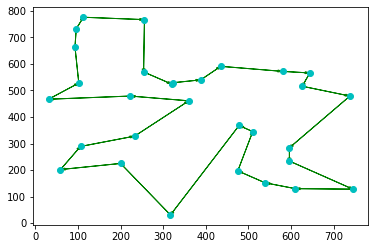

In [6]:
import random
def get_neighbour_state(cities):
    '''
    Inputs:
    - cities    : list of cities of form [c1, c2, ..., cn]. ordered by path.
    Output:
    - neighbour : list of cities of form [c1, c2, ..., cn]. ordered by path.
                  find this neighbour based on the information above.
    '''
    random_list = random.sample(range(0, len(cities)), 2)
    rand_1 = random_list[0]
    rand_2 = random_list[1]
    what_to_do = random.sample(range(0, 2), 1)
    if what_to_do[0] == 0:
        cities[rand_1], cities[rand_2] = cities[rand_2], cities[rand_1]
    else:
        min_ = min(rand_1, rand_2)
        max_ = max(rand_1, rand_2)
        new_list = cities[min_:max_ + 1]
        new_list.reverse()
        cities[min_:max_ + 1] = new_list

    return cities

        
         
def simulated_annealing(cities, T=300, alpha=0.99, stopping_temperature=1e-8):
    '''
    Inputs:
    - cities               : list of cities of form [c1, c2, ..., cn]. ordered by path.
    - T                    : the temperature value of simulated annealing.
    - alpha                : exponential decay factor for T.
    - stopping_temparature : stop the alogorithm if T drops below this.
    Output:
    - solution             : list of cities of form [c1, c2, ..., cn]. ordered by path.
    '''
    counter = 0
    current_dist = get_distance_tsp(cities)
    current_cities = list(cities)
    while True:
        p = np.e ** (-counter/(alpha * T))
        if p < stopping_temperature:
            return current_cities
        new_neighbor = get_neighbour_state(list(current_cities))
        new_dist = get_distance_tsp(new_neighbor)
        if new_dist < current_dist:
            current_dist = new_dist
            current_cities = list(new_neighbor)
        else:
            output = random.choices([0, 1], weights=[p, 1- p], k=1)
            if output[0] == 0:
                current_dist = new_dist
                current_cities = list(new_neighbor)

        counter += 1     

solution = simulated_annealing(cities)
print(f'initial path length={get_distance_tsp(cities)}, path length of hill climbing={get_distance_tsp(solution)}')
plotTSP(solution)


# Algorithm 3: genetic algorithm (optional 10 points)


Initial population: 
GNOME	 FITNESS VALUE

Current temp:  572641.6897022346
Generation 50
GNOME	 FITNESS VALUE
population[i].fitness = 4132.869833317509
population[i].fitness = 4295.450355099991
population[i].fitness = 4332.926252142585
population[i].fitness = 4304.455439272098
population[i].fitness = 4328.306596252802
population[i].fitness = 4540.51861985063
population[i].fitness = 4554.6735751270035
population[i].fitness = 4640.276398750263
population[i].fitness = 4660.801148934563
population[i].fitness = 4703.420884480723
population[i].fitness = 4770.394026234543
population[i].fitness = 4802.183571433984
population[i].fitness = 4806.821250039297
population[i].fitness = 4864.66602954666
population[i].fitness = 4880.202739161398
population[i].fitness = 4880.5220528206255
population[i].fitness = 4844.355608986976
population[i].fitness = 4900.041574269765
population[i].fitness = 4959.93904410771
population[i].fitness = 4874.336083242566
population[i].fitness = 5055.939702102689
populat

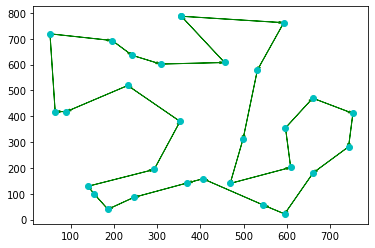

In [27]:
# Got help from geeks for geeks
from random import randint
Vertex_numbers = 30
GENES = list(cities)

START = 0

size_for_list_pop = 100
class individual:
	def __init__(self) -> None:
		self.gnome = []
		self.fitness = 0

	def __lt__(self, other):
		return self.fitness < other.fitness

	def __gt__(self, other):
		return self.fitness > other.fitness

def rand_num(start, end):
	return randint(start, end-1)

def repeat(list_, city):
	for x_city in list_:
		if x_city.x == city.x and x_city.y == city.y:
			return True


	return False

def mutatedGene(gnome):
	gnome = list(gnome)
	while True:
		r = rand_num(1, Vertex_numbers)
		r1 = rand_num(1, Vertex_numbers)
		if r1 != r:
			temp = gnome[r]
			gnome[r] = gnome[r1]
			gnome[r1] = temp
			break
	return gnome


def create_gnome():
	gnome = []
	gnome.append(cities[0])
	while True:
		if len(gnome) == Vertex_numbers - 1:
			gnome.append(cities[-1])
			break

		temp = rand_num(1, Vertex_numbers)
		if not repeat(gnome, cities[temp]):
			gnome.append(cities[temp])

	return gnome



def calculte_fitness(gnome):
	return get_distance_tsp(gnome)


def cooldown(temp):
	return (90 * temp) / 100



def TSPUtil():

	gen = 1
	gen_thres = 50 

	population = []
	temp = individual()

	for i in range(size_for_list_pop):
		temp.gnome = create_gnome()
		temp.fitness = calculte_fitness(temp.gnome)
		population.append(temp)

	print("\nInitial population: \nGNOME	 FITNESS VALUE\n")
	for i in range(size_for_list_pop):
		print(f"population[i].fitness = {population[i].fitness}")
	print()

	temperature = 100000000

	while temperature > 1000 and gen <= gen_thres:
		population.sort()
		print("\nCurrent temp: ", temperature)
		new_population = []

		for i in range(size_for_list_pop):
			p1 = population[i]

			while True:
				new_g = mutatedGene(p1.gnome)
				new_gnome = individual()
				new_gnome.gnome = new_g
				new_gnome.fitness = calculte_fitness(new_gnome.gnome)

				if new_gnome.fitness <= population[i].fitness:
					new_population.append(new_gnome)
					break

				else:

					prob = pow(2.7,-1* ((float)(new_gnome.fitness - population[i].fitness)/ (temperature * 0.5)),)
					if prob > 0.9999999:
						new_population.append(new_gnome)
						break

		temperature = cooldown(temperature)
		population = new_population
		print("Generation", gen)
		print("GNOME	 FITNESS VALUE")

		for i in range(size_for_list_pop):
			print(f"population[i].fitness = {population[i].fitness}")
		gen += 1
	plotTSP(population[0].gnome)
	print(population[0].fitness)



if __name__ == "__main__":
	TSPUtil()
	# takes about 10-20 seconds to execute

This part is optional and you can earn up to 10 extra point from it. In the theoretical part of this assignment, you created a genetic algorithm for the TSP problem. implement you algotihm here and plot the solution at the end.